# **Image Classfication on CIFAR-10 dataset**
The objective of this project is to build an image classification model to classify 32x32 color images from the CIFAR-10 dataset into one of the ten classes

**About the CIFAR-10 dataset**

The CIFAR-10 dataset consists of 60,000 images across 10 classes, with 6,000 images per class. The classes are 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', and 'truck'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
# The CIFAR-10 dataset is loaded using Keras, and the images' pixel values are normalized to [0, 1]
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0



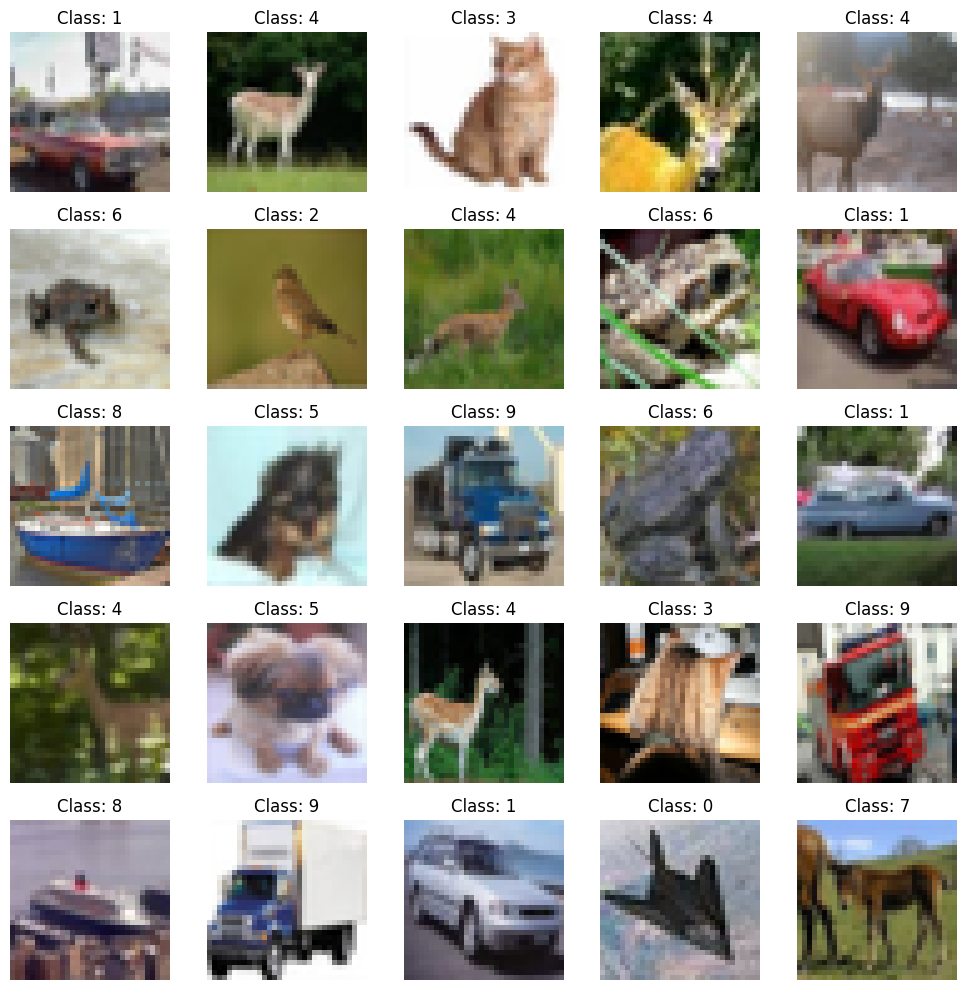

In [4]:
# Display some random training images
num_images_to_display = 25
indices = np.random.choice(len(X_train), num_images_to_display, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f"Class: {y_train[idx][0]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
# A Convolutional Neural Network (CNN) model is built using Keras.
# The model consists of three convolutional layers with max-pooling, followed by two fully connected layers.
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

In [10]:
# Compile the model with an optimizer, loss function, and accuracy metric. It is then trained on the training set with 10 epochs.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
y_test_labels = y_test.astype(int).flatten()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Epoch 1/10
352/352 [==============================] - 5s 7ms/step - loss: 0.6766 - accuracy: 0.7632 - val_loss: 0.9177 - val_accuracy: 0.6832
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 0.6413 - accuracy: 0.7758 - val_loss: 0.8049 - val_accuracy: 0.7302
Epoch 3/10
352/352 [==============================] - 2s 6ms/step - loss: 0.6066 - accuracy: 0.7882 - val_loss: 0.8575 - val_accuracy: 0.7096
Epoch 4/10
352/352 [==============================] - 2s 7ms/step - loss: 0.5805 - accuracy: 0.7966 - val_loss: 0.8204 - val_accuracy: 0.7336
Epoch 5/10
352/352 [==============================] - 2s 6ms/step - loss: 0.5463 - accuracy: 0.8087 - val_loss: 0.8394 - val_accuracy: 0.7264
Epoch 6/10
352/352 [==============================] - 2s 6ms/step - loss: 0.5194 - accuracy: 0.8171 - val_loss: 0.8209 - val_accuracy: 0.7376
Epoch 7/10
352/352 [==============================] - 2s 6ms/step - loss: 0.4947 - accuracy: 0.8279 - val_loss: 0.8445 - val_accuracy: 0.7400
Epoch 

In [11]:
# Calculate different accuracy metrics
#Performance is evaluated on the test set using various metrics such as accuracy, precision, recall, F1 score, and ROC AUC score.

accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7218
Precision: 0.7219746143877771
Recall: 0.7218
F1 Score: 0.7190737105894334
ROC AUC Score: 0.9578691444444443


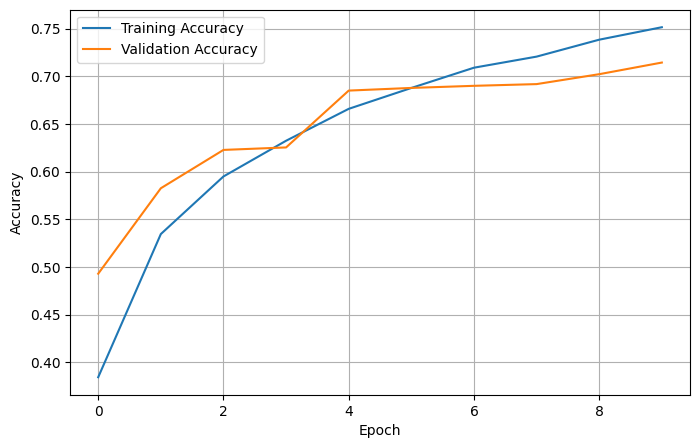

In [12]:
# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

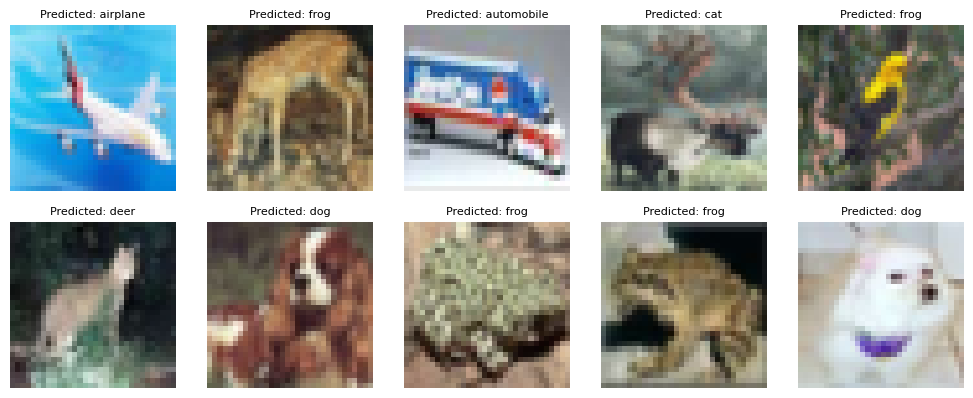

In [23]:
num_images_to_display = 10
indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"Predicted: {class_names[y_pred_labels[idx]]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()